In [53]:
# import thư viện
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [51]:
!pip install wordcloud


In [39]:
#đọc dữ liệu
df1 =pd.read_csv('Danh_gia_cleaned_updated.csv',index_col=0)
df1

,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,content_new
ma_khach_hang,,,,,,
443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015,dễ_dàng thoải_mái
1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015,dễ_dàng thoải_mái
689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594,thích hasaki_tẩy
2519,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,17/07/2022,13:48,5,204100075,sạch tốt loại_bỏ bẩn dầu_thừa kích_ứng sạch mà...
402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977,rửa tốt sạch mịn
...,...,...,...,...,...,...
1158,"Dùng sp này bị ghiền luôn, hạt siêu mịn, mùi t...",6/8/2024,7:39,5,422206043,ghiền mịn thơm dễ_chịu sạch
760,"Mua nhiều lần ở đây rồi ạ. Sản phẩm ok, giá rẻ...",17/02/2022,22:49,5,100230057,yêu
2248,"Sản phẩm có một số hạn chế, không thực sự ưng ý.",5/12/2023,22:10,2,422201504,hạn_chế


In [40]:
# Loại bỏ các dòng chứa giá trị NaN
df1 = df1.dropna()

# Kiểm tra lại dữ liệu sau khi loại bỏ NaN
print(df1.info())  # Hiển thị thông tin cấu trúc DataFrame
print(df1.head())  # Hiển thị vài dòng đầu tiên


<class 'pandas.core.frame.DataFrame'>
Index: 18983 entries, 443 to 220
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   noi_dung_binh_luan  18983 non-null  object
 1   ngay_binh_luan      18983 non-null  object
 2   gio_binh_luan       18983 non-null  object
 3   so_sao              18983 non-null  int64 
 4   ma_san_pham         18983 non-null  int64 
 5   content_new         18983 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB
None
                                              noi_dung_binh_luan  \
ma_khach_hang                                                      
443             SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.   
1030               Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ   
689                    Mình rất thích hasaki va sp tẩy trang này   
2519           Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...   
402                 Sữa rửa mặt tốt,sạch mụn,mịn d

In [41]:
# Kiểm tra các cột có kiểu dữ liệu là float
float_columns = df1.select_dtypes(include=['float64'])

# Hiển thị các cột dạng float (nếu có)
if not float_columns.empty:
    print("Các cột chứa dữ liệu dạng float:")
    print(float_columns.head())
else:
    print("Không có cột nào chứa dữ liệu dạng float trong DataFrame.")


Không có cột nào chứa dữ liệu dạng float trong DataFrame.


In [42]:
# Thêm cột 'label' dựa trên giá trị của cột 'so_sao'
df1['label'] = df1['so_sao'].apply(lambda x: 'negative' if x < 3 else 'positive')

# Kiểm tra kết quả
print(df1[['so_sao', 'label']].head())


               so_sao     label
ma_khach_hang                  
443                 5  positive
1030                5  positive
689                 5  positive
2519                5  positive
402                 5  positive


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\1813113731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['so_sao'].apply(lambda x: 'negative' if x < 3 else 'positive')


In [43]:
# Kiểm tra số lượng mỗi nhãn
print(df1['label'].value_counts())


label
positive    18006
negative      977
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\1349378211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='label', palette='Set2')


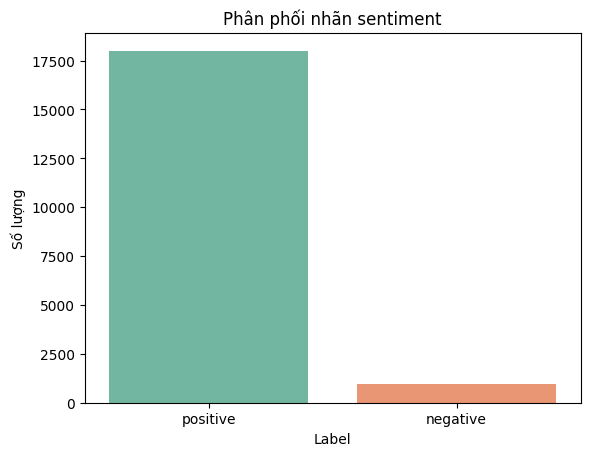

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df1, x='label', palette='Set2')
plt.title('Phân phối nhãn sentiment')
plt.xlabel('Label')
plt.ylabel('Số lượng')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\2704307710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content_new'] = df1['content_new'].astype(str)


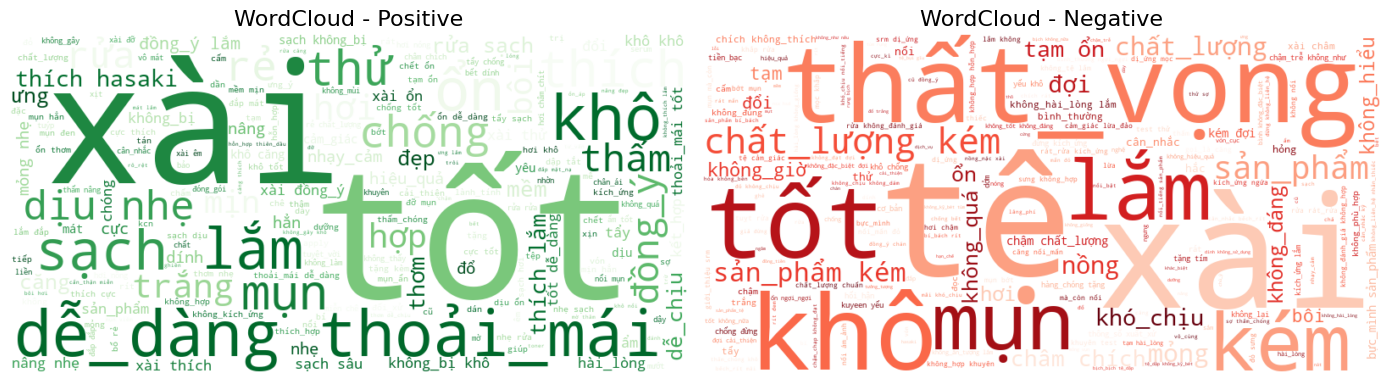

In [55]:
# Đảm bảo tất cả các giá trị trong cột 'content_new' đều là chuỗi
df1['content_new'] = df1['content_new'].astype(str)

# Tách dữ liệu theo nhãn
positive_text = ' '.join(df1[df1['label'] == 'positive']['content_new'])
negative_text = ' '.join(df1[df1['label'] == 'negative']['content_new'])

# Tạo WordCloud cho nhãn positive
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Tạo WordCloud cho nhãn negative
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Hiển thị WordCloud
plt.figure(figsize=(14, 7))

# WordCloud Positive
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('WordCloud - Positive', fontsize=16)
plt.axis('off')

# WordCloud Negative
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('WordCloud - Negative', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [57]:
#đọc dữ liệu
df2 =pd.read_csv('San_pham.csv',index_col=0)
df2

,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh
ma_san_pham,,,,,,
318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8
205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7
422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9
204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6
253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6
...,...,...,...,...,...,...
422219670,Serum Chống Nắng Dưỡng Thể Bioré Peach Pearly ...,185000,259000.0,Light To Medium\nMedium To Tan,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,0.0
226200001,Khăn Tẩy Trang Acnes 20 Miếng,53000,65000.0,NaN,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,3.5
422218200,Mặt Nạ Colorkey Dưỡng Ẩm Sáng Da Với Niacinami...,11000,15000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0


In [59]:
import pandas as pd

# Đọc dữ liệu nhận xét và sản phẩm từ file CSV
df1 = pd.read_csv('Danh_gia_cleaned_updated.csv')  # DataFrame chứa các review
df2 = pd.read_csv('san_pham.csv')  # DataFrame chứa thông tin sản phẩm

# Kiểm tra dữ liệu
print(df1.head())
print(df2.head())


   ma_khach_hang                                 noi_dung_binh_luan  \
0            443   SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.   
1           1030      Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ   
2            689          Mình rất thích hasaki va sp tẩy trang này   
3           2519  Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...   
4            402       Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha   

  ngay_binh_luan gio_binh_luan  so_sao  ma_san_pham  \
0     29/04/2023         17:06       5    308500015   
1     30/04/2023         15:04       5    308500015   
2     30/04/2023         18:34       5    422216594   
3     17/07/2022         13:48       5    204100075   
4     15/04/2023         23:04       5    422208977   

                                         content_new  
0                                  dễ_dàng thoải_mái  
1                                  dễ_dàng thoải_mái  
2                                   thích hasaki_tẩy  
3  sạch tốt loại_bỏ bẩ

In [61]:
# Tạo cột 'label' dựa trên cột 'so_sao'
df1['label'] = df1['so_sao'].apply(lambda x: 'positive' if x >= 3 else 'negative')

# Kiểm tra lại dữ liệu
print(df1[['so_sao', 'label']].head())


   so_sao     label
0       5  positive
1       5  positive
2       5  positive
3       5  positive
4       5  positive


In [63]:
# Giả sử mã sản phẩm cần phân tích
product_code = 308500015

# Lọc các nhận xét liên quan đến sản phẩm
product_reviews = df1[df1['ma_san_pham'] == product_code]

# Lọc các nhận xét tích cực và tiêu cực
positive_reviews = product_reviews[product_reviews['label'] == 'positive']
negative_reviews = product_reviews[product_reviews['label'] == 'negative']

# Hiển thị số lượng nhận xét tích cực và tiêu cực
print(f"Số nhận xét tích cực: {len(positive_reviews)}")
print(f"Số nhận xét tiêu cực: {len(negative_reviews)}")


Số nhận xét tích cực: 240
Số nhận xét tiêu cực: 11


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\551231897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['content_new'] = positive_reviews['content_new'].fillna('').astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\551231897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['content_new'] = negative_reviews['content_new'].fillna('').astype(str)


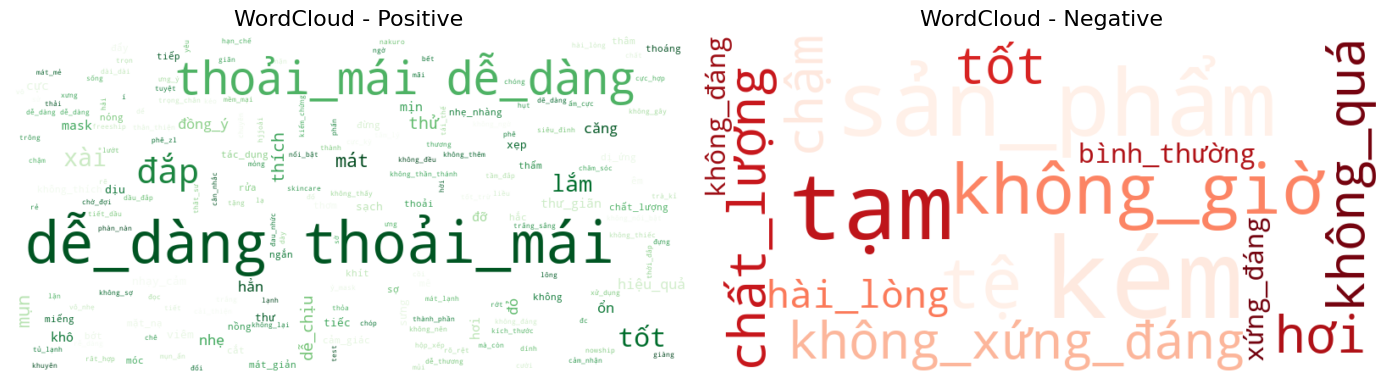

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Đảm bảo rằng tất cả các giá trị trong 'content_new' là chuỗi và loại bỏ NaN
positive_reviews['content_new'] = positive_reviews['content_new'].fillna('').astype(str)
negative_reviews['content_new'] = negative_reviews['content_new'].fillna('').astype(str)

# Tạo WordCloud cho nhận xét tích cực
positive_text = ' '.join(positive_reviews['content_new'])
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Tạo WordCloud cho nhận xét tiêu cực
negative_text = ' '.join(negative_reviews['content_new'])
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Hiển thị WordCloud
plt.figure(figsize=(14, 7))

# WordCloud Positive
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('WordCloud - Positive', fontsize=16)
plt.axis('off')

# WordCloud Negative
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('WordCloud - Negative', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Loại bỏ các dòng có giá trị NaN hoặc thay thế NaN bằng chuỗi rỗng
product_reviews['content_new'] = product_reviews['content_new'].fillna('')

# Tạo mô hình TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = vectorizer.fit_transform(product_reviews['content_new'])

# Lấy các từ khóa quan trọng
features = vectorizer.get_feature_names_out()
print("Các từ khóa chính:", features)


Các từ khóa chính: ['dễ_dàng' 'lắm' 'mát' 'mụn' 'thoải_mái' 'thích' 'thử' 'tốt' 'xài' 'đắp']


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\3035451101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['content_new'] = product_reviews['content_new'].fillna('')


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\4016687382.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  product_reviews['ngay_binh_luan'] = pd.to_datetime(product_reviews['ngay_binh_luan'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\4016687382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['ngay_binh_luan'] = pd.to_datetime(product_reviews['ngay_binh_luan'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\4016687382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

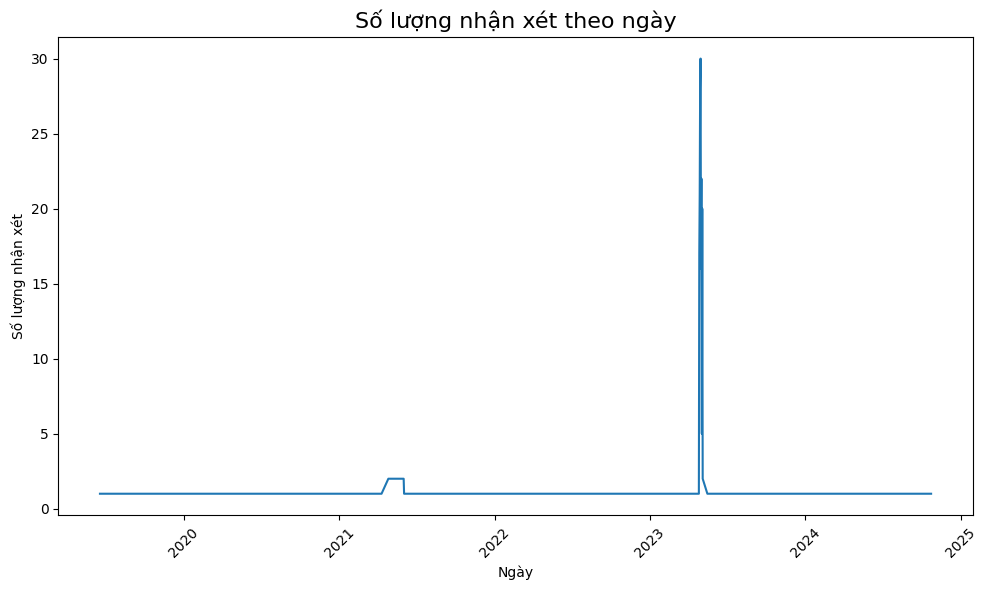

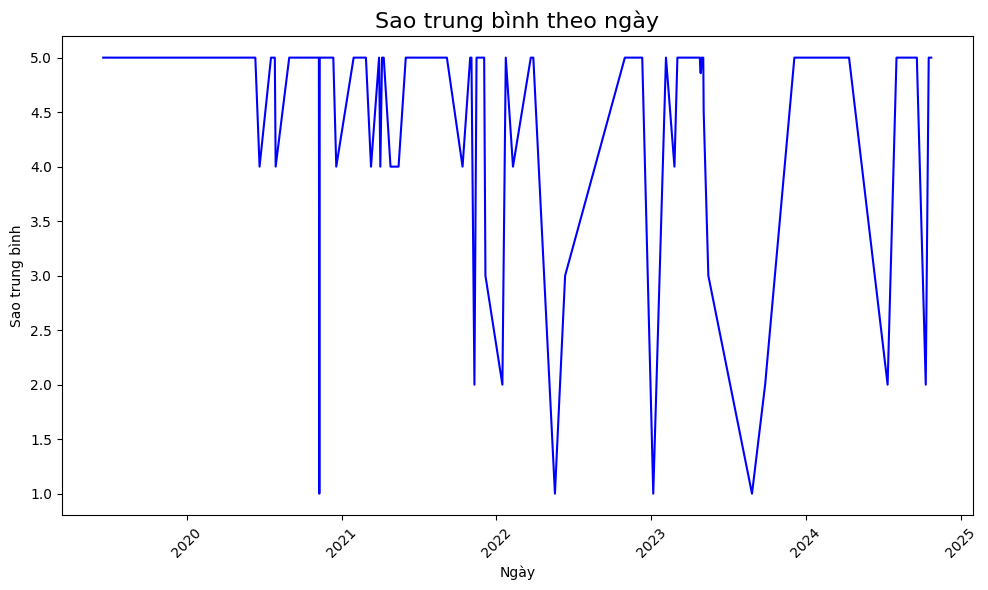

In [69]:
# Trực quan hóa số lượng nhận xét theo ngày
product_reviews['ngay_binh_luan'] = pd.to_datetime(product_reviews['ngay_binh_luan'])
product_reviews['day'] = product_reviews['ngay_binh_luan'].dt.date
daily_reviews = product_reviews.groupby('day').size()

plt.figure(figsize=(10, 6))
daily_reviews.plot(kind='line')
plt.title('Số lượng nhận xét theo ngày', fontsize=16)
plt.xlabel('Ngày')
plt.ylabel('Số lượng nhận xét')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trực quan hóa số sao trung bình theo ngày
average_rating = product_reviews.groupby('day')['so_sao'].mean()

plt.figure(figsize=(10, 6))
average_rating.plot(kind='line', color='blue')
plt.title('Sao trung bình theo ngày', fontsize=16)
plt.xlabel('Ngày')
plt.ylabel('Sao trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
# Hiển thị thông tin sản phẩm
print(f"Tên sản phẩm: {df2['ten_san_pham'].values[0]}")
print(f"Giá bán: {df2['gia_ban'].values[0]}")
print(f"Giá gốc: {df2['gia_goc'].values[0]}")
print(f"Phân loại: {df2['phan_loai'].values[0]}")
print(f"Điểm trung bình: {df2['diem_trung_binh'].values[0]}")

# Hiển thị số nhận xét tích cực và tiêu cực
print(f"Số nhận xét tích cực: {len(positive_reviews)}")
print(f"Số nhận xét tiêu cực: {len(negative_reviews)}")

# Hiển thị các từ khóa chính
print("Các từ khóa chính:", features)


Tên sản phẩm: Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm 180ml
Giá bán: 209000
Giá gốc: 435000.0
Phân loại: 2x180ml
180ml
Không Mùi
Có Mùi Hương
Điểm trung bình: 4.8
Số nhận xét tích cực: 240
Số nhận xét tiêu cực: 11
Các từ khóa chính: ['dễ_dàng' 'lắm' 'mát' 'mụn' 'thoải_mái' 'thích' 'thử' 'tốt' 'xài' 'đắp']


In [81]:
# Sử dụng .loc[] để đảm bảo rằng bạn đang làm việc với DataFrame gốc
product_reviews.loc[positive_reviews.index, 'content_new'] = positive_reviews['content_new'].fillna('').astype(str)
product_reviews.loc[negative_reviews.index, 'content_new'] = negative_reviews['content_new'].fillna('').astype(str)


Nhập mã sản phẩm cần phân tích:  318900012


Số nhận xét tích cực: 105
Số nhận xét tiêu cực: 2


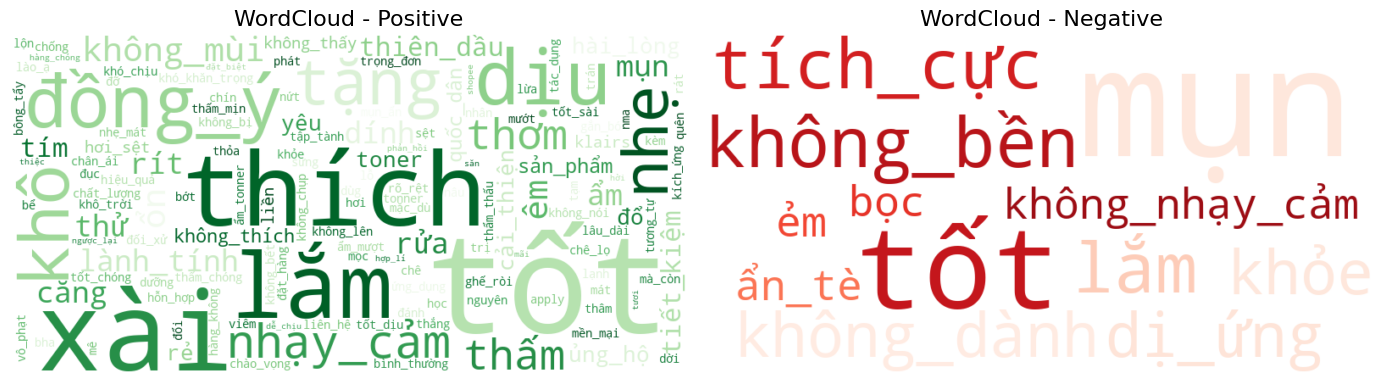

Các từ khóa chính: ['dịu' 'khô' 'lắm' 'nhạy_cảm' 'nhẹ' 'thích' 'tặng' 'tốt' 'xài' 'đồng_ý']


C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\351545292.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['ngay_binh_luan'] = pd.to_datetime(product_reviews['ngay_binh_luan'], dayfirst=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5480\351545292.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews.loc[:, 'day'] = product_reviews['ngay_binh_luan'].dt.date


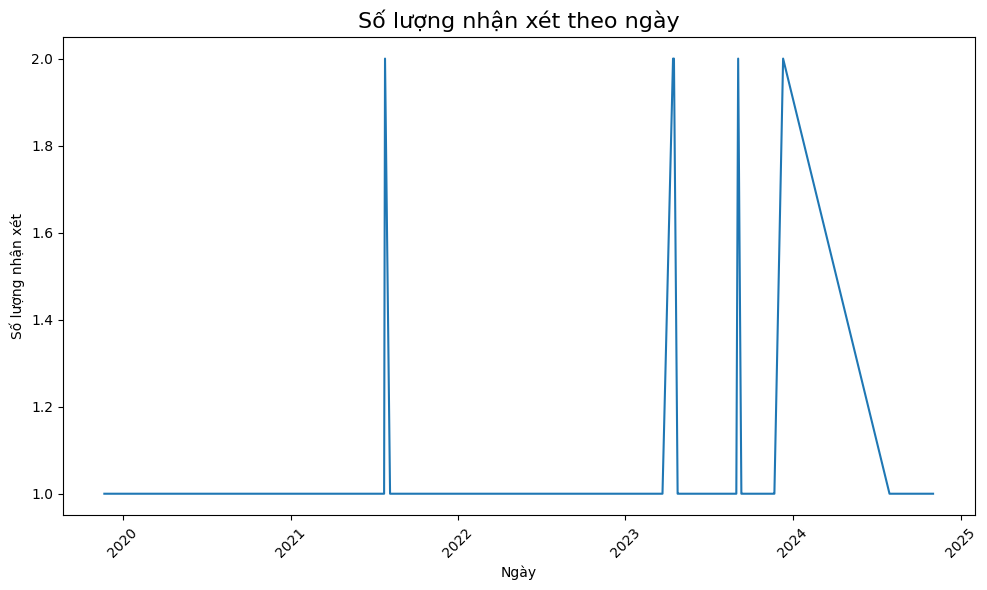

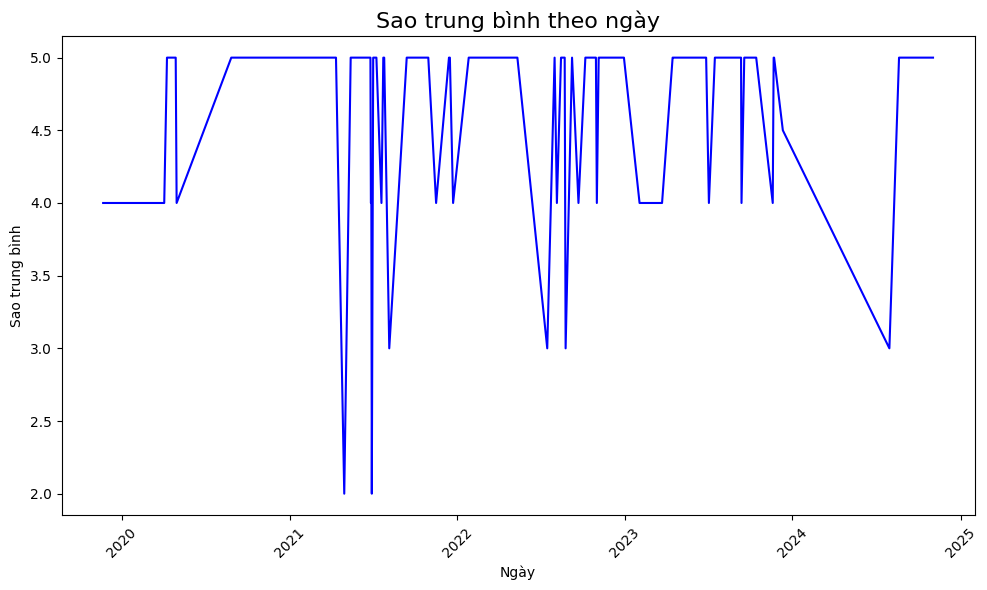

Tên sản phẩm: Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm 180ml
Giá bán: 209000
Giá gốc: 435000.0
Phân loại: 2x180ml
180ml
Không Mùi
Có Mùi Hương
Điểm trung bình: 4.8
Số nhận xét tích cực: 105
Số nhận xét tiêu cực: 2
Các từ khóa chính: ['dịu' 'khô' 'lắm' 'nhạy_cảm' 'nhẹ' 'thích' 'tặng' 'tốt' 'xài' 'đồng_ý']


In [85]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Giả sử df1, df2 là DataFrame chứa dữ liệu nhận xét và thông tin sản phẩm
# df1 chứa các cột: 'ma_san_pham', 'label', 'content_new', 'ngay_binh_luan', 'so_sao'
# df2 chứa các cột: 'ma_san_pham', 'ten_san_pham', 'gia_ban', 'gia_goc', 'phan_loai', 'diem_trung_binh'

def analyze_product_reviews(product_code):
    # Lọc các nhận xét liên quan đến sản phẩm
    product_reviews = df1[df1['ma_san_pham'] == product_code]

    # Lọc các nhận xét tích cực và tiêu cực
    positive_reviews = product_reviews[product_reviews['label'] == 'positive']
    negative_reviews = product_reviews[product_reviews['label'] == 'negative']

    # Hiển thị số lượng nhận xét tích cực và tiêu cực
    print(f"Số nhận xét tích cực: {len(positive_reviews)}")
    print(f"Số nhận xét tiêu cực: {len(negative_reviews)}")

    # Tạo WordCloud cho nhận xét tích cực và tiêu cực
    positive_reviews.loc[:, 'content_new'] = positive_reviews['content_new'].fillna('').astype(str)
    negative_reviews.loc[:, 'content_new'] = negative_reviews['content_new'].fillna('').astype(str)

    positive_text = ' '.join(positive_reviews['content_new'])
    positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

    negative_text = ' '.join(negative_reviews['content_new'])
    negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

    # Hiển thị WordCloud
    plt.figure(figsize=(14, 7))

    # WordCloud Positive
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wc, interpolation='bilinear')
    plt.title('WordCloud - Positive', fontsize=16)
    plt.axis('off')

    # WordCloud Negative
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wc, interpolation='bilinear')
    plt.title('WordCloud - Negative', fontsize=16)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Tạo mô hình TF-IDF
    product_reviews.loc[:, 'content_new'] = product_reviews['content_new'].fillna('')
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = vectorizer.fit_transform(product_reviews['content_new'])

    # Lấy các từ khóa quan trọng
    features = vectorizer.get_feature_names_out()
    print("Các từ khóa chính:", features)

    # Trực quan hóa số lượng nhận xét theo ngày
    product_reviews['ngay_binh_luan'] = pd.to_datetime(product_reviews['ngay_binh_luan'], dayfirst=True)
    product_reviews.loc[:, 'day'] = product_reviews['ngay_binh_luan'].dt.date
    daily_reviews = product_reviews.groupby('day').size()

    plt.figure(figsize=(10, 6))
    daily_reviews.plot(kind='line')
    plt.title('Số lượng nhận xét theo ngày', fontsize=16)
    plt.xlabel('Ngày')
    plt.ylabel('Số lượng nhận xét')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Trực quan hóa số sao trung bình theo ngày
    average_rating = product_reviews.groupby('day')['so_sao'].mean()

    plt.figure(figsize=(10, 6))
    average_rating.plot(kind='line', color='blue')
    plt.title('Sao trung bình theo ngày', fontsize=16)
    plt.xlabel('Ngày')
    plt.ylabel('Sao trung bình')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Hiển thị thông tin sản phẩm
    product_info = df2[df2['ma_san_pham'] == product_code].iloc[0]
    print(f"Tên sản phẩm: {product_info['ten_san_pham']}")
    print(f"Giá bán: {product_info['gia_ban']}")
    print(f"Giá gốc: {product_info['gia_goc']}")
    print(f"Phân loại: {product_info['phan_loai']}")
    print(f"Điểm trung bình: {product_info['diem_trung_binh']}")

    # Hiển thị số nhận xét tích cực và tiêu cực
    print(f"Số nhận xét tích cực: {len(positive_reviews)}")
    print(f"Số nhận xét tiêu cực: {len(negative_reviews)}")

    # Hiển thị các từ khóa chính
    print("Các từ khóa chính:", features)

# Ví dụ sử dụng hàm:
product_code_input = int(input("Nhập mã sản phẩm cần phân tích: "))
analyze_product_reviews(product_code_input)
